In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud

In [21]:
%matplotlib inline

In [22]:
plt.rcParams['figure.figsize'] = (10, 5)

In [23]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [24]:
# Dataset 1 (Ramen Ratings)

In [25]:
ramen_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
ramen_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [26]:
ramen_rater.sample(10)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1618,1082,Indomie,Mi Goreng Cabe Ijo,Pack,Indonesia,4.5,NaN
2210,490,Foodmon,DJ DOC Instant rice Ramen Topokki,Bowl,South Korea,5,NaN
2498,202,Nongshim,Bowl Noodle Cabbage Kimchi,Bowl,United States,3.25,NaN
2672,28,Nissin,Chikin Ramen,Pack,Japan,5,NaN
725,1975,Nissin,Soba Fried Noodles Classic,Pack,Germany,3.25,NaN
1437,1263,Nissin,Cup Noodle Curry X Gunpla RX-78-2 Gundam,Cup,Japan,4.25,NaN
1046,1654,MyOri,Malaysia Penang White Curry Noodle Super Spicy,Pack,Malaysia,5,NaN
583,2117,7 Select,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,Thailand,3.75,NaN
1338,1362,Mamee,Instant Noodles Curry Flavour,Pack,Malaysia,3.5,NaN
1398,1302,Mama,Instant Noodles Yentafo Tom Yum Mohfai Flavour,Pack,Thailand,5,2014 #10


In [27]:
ramen_rater["Top Ten"].value_counts()

\n          4
2016 #10    1
2012 #10    1
2014 #1     1
2013 #1     1
2013 #2     1
2013 #4     1
2013 #9     1
2013 #3     1
2012 #7     1
2016 #1     1
2012 #5     1
2012 #3     1
2012 #6     1
2012 #9     1
2012 #1     1
2012 #2     1
2013 #6     1
2014 #6     1
2014 #5     1
2014 #8     1
2014 #10    1
2016 #8     1
2016 #5     1
2016 #9     1
2016 #7     1
2015 #10    1
2015 #7     1
2015 #4     1
2015 #9     1
2015 #6     1
2015 #1     1
2013 #10    1
2015 #8     1
2014 #7     1
2014 #4     1
2014 #9     1
2012 #4     1
Name: Top Ten, dtype: int64

In [28]:
tops = ramen_rater[[type(x)is str for x in ramen_rater["Top Ten"]]]
tops[["2015" in x for x in tops["Top Ten"]]]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
1083,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
1115,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9
1192,1508,Mamee,Chef Gold Recipe Mi Kari Seribu Rasa,Pack,Malaysia,5,2015 #6
1200,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5,2015 #1
1234,1466,Mama,Oriental Style Instant Noodles Green Curry Fla...,Pack,Thailand,5,2015 #8


In [44]:
#wordcloud plot
Text = ramen_rater['Variety'].sample(50)
Text.head()



1046       Malaysia Penang White Curry Noodle Super Spicy
1470                    Sajimee Original Soto Soup Flavor
1205                           Instant Noodles Mee Goreng
2375                                      Artificial Pork
1447    Chow Mein Teriyaki Chicken Flavor Chow Mein No...
Name: Variety, dtype: object

In [45]:
list_of_variety = Text.to_list()
print(list_of_variety)


['Malaysia Penang White Curry Noodle Super Spicy', 'Sajimee Original Soto Soup Flavor', 'Instant Noodles Mee Goreng', 'Artificial Pork', 'Chow Mein Teriyaki Chicken Flavor Chow Mein Noodles', 'Cup Noodles Tom Yam Seafood Flavour', 'Kingcook Shrimp', 'Hakata Ossyoi', 'Cup Noodles Spicy Chile Chicken', 'Ramen Noodle Soup Chili', 'Demae Ramen Curry Flavor', 'Pad Thai Instant rice Noodles & Sauce', 'Hwa Ramyun Soy Peptide', 'Super Big Ramen Soy Sauce', 'Single Noble Pickled Radish & Duck', 'Top Ramen Shrimp', 'Steam Vermicelli', 'Instant Noodles Chicken Flavour', 'Raoh Tonkotsu', 'Kung Fu Shrimp', 'Teumsae Ramyun', 'Instant Noodles With Onion Flavour', 'Namja Ramyun (US Version)', 'Sanukiya Udon', 'Chand Clear Soup', 'Hello Kitty Hakata Shoyutonkotsu Ramen', 'Buldak Bokkeummyun Snack', 'Instant Noodles Seafood Flavour', 'Red King Crab Flavour Ramen', 'Cup Noodles Veggi Manchow', 'Sesame Oil Chicken Noodle With Rice Wine', 'Cup Noodles Minced Pork Flavour', 'Pickled Vegetable', 'Instant Noo

In [58]:
texts= list_of_variety[0]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviews.".format(len(texts)))

There are 1383 words in the combination of all reviews.


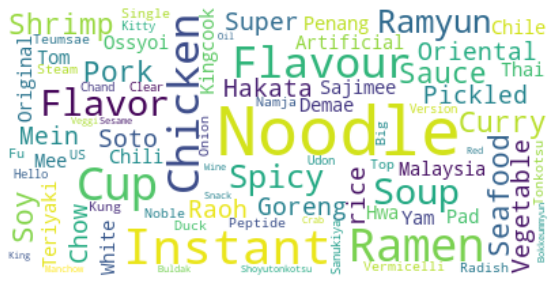

In [61]:
wordcloud = WordCloud(background_color="white", margin=2, min_font_size= 5, max_font_size=50, max_words= 80, min_word_length=0).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [32]:
ramen_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
ramen_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [33]:
ramen_demands.set_index("Countries/Region", inplace=True)


In [34]:
ramen_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


<AxesSubplot:xlabel='Countries/Region'>

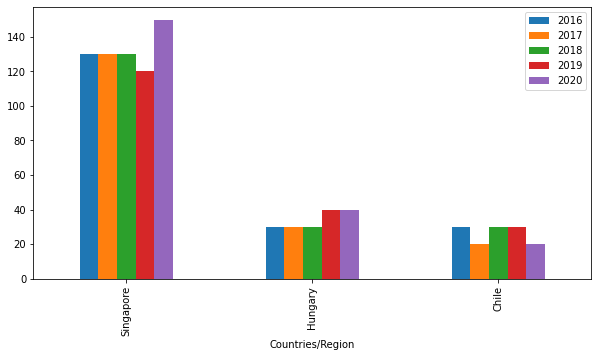

In [35]:
group_5 =ramen_demands.sample(3)
group_5.plot(kind="bar")
